#  Education : Linear Regression

# 0.0 Problem Definition

Education Institute has helped thousands of students in GMAT, GRE and SAT exams.They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league
college. This feature estimates the chances of graduate admission from an Indian perspective

# 0.1 Data Problem
Here we need to build a model which can predict probability of getting into IVY league college. Since this we a continuous value we need to use regression model for doing prediction. We need  to  help Education Institute in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves


# 0.2 Column Profile
• Serial No. (Unique row ID)  
• GRE Scores (out of 340)  
• TOEFL Scores (out of 120)  
• University Rating (out of 5)   
• Statement of Purpose and Letter of Recommendation Strength (out of 5)  
• Undergraduate GPA (out of 10)   
• Research Experience (either 0 or 1)   
• Chance of Admit (ranging from 0 to 1)   

# 0.3 Data download

# 1.0 Exploratory Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as met

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/case

/content/drive/My Drive/case


In [5]:
df = pd.read_csv('edu.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- dataset has 500 rows and 9 columns
- there are no nulls in dataset

In [7]:
# remove Serial No. since it not required for modelling
df = df.drop('Serial No.', axis=1)

In [8]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


Columns with cardinality less than 10 can be considered as categorical.
these columns are
- University Rating      
- SOP                    
- LOR                    
- Research               

In [9]:
df.describe().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


## 1.2 Univariate Analysis

###  1.2.1 Numeric Features

In [10]:
def plotcol(df,col):
    '''
    function to plot histogram,box plot for column
    '''
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(data=df,x=col,kde='True',ax=ax[0])
    sns.boxplot(data=df,y=col,width=0.2,ax=ax[1])
    plt.subplots_adjust(wspace=0.3)
    plt.show()

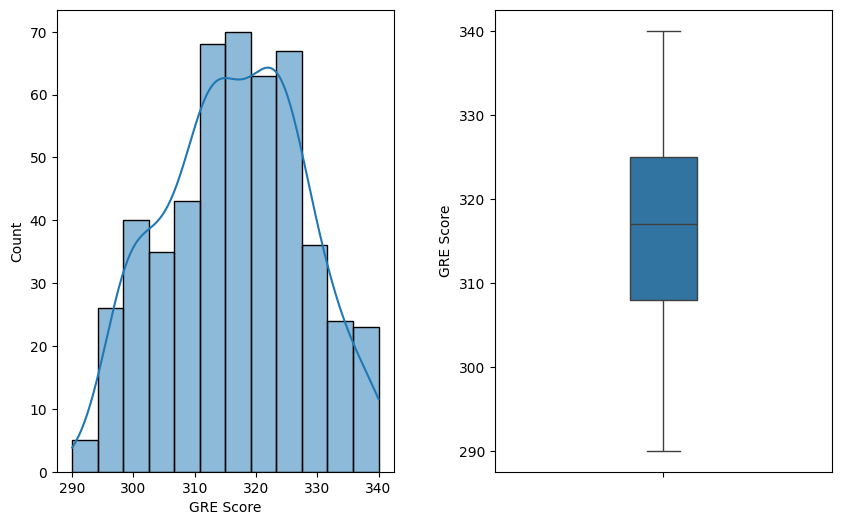

In [11]:
 plotcol(df,'GRE Score')

- most GRE scores are in range 310-330
- GRE scores has no outliers

In [12]:
df['GRE Score'].describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


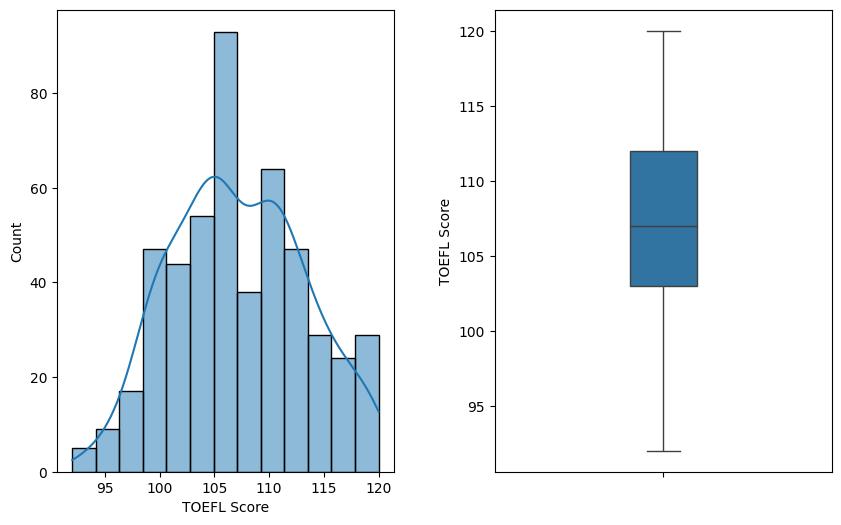

In [13]:
 plotcol(df,'TOEFL Score')

- most TOEFL scores are in range 100-115
- TOEFL scores has no outliers

In [14]:
df['TOEFL Score'].describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


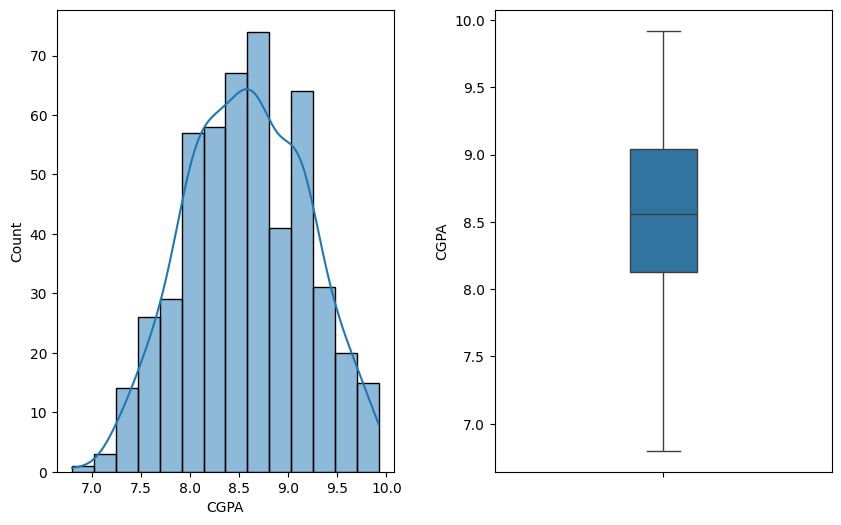

In [15]:
 plotcol(df,'CGPA')

- most CGPA scores are in range 8.0 - 9.0
- CGPA scores has no outliers

In [16]:
df['CGPA'].describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


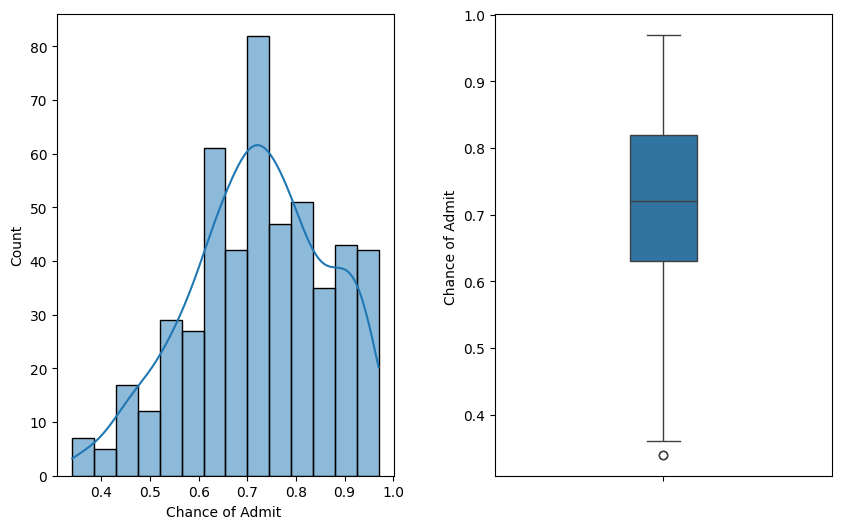

In [17]:
plotcol(df,'Chance of Admit ')

- most Chance of Admit scores are in range .63 - .82
- Chance of Admit scores has few outliers, these can be ignored

In [18]:
df['Chance of Admit '].describe()

,Chance of Admit
count,500.00000
mean,0.72174
std,0.14114
min,0.34000
25%,0.63000
50%,0.72000
75%,0.82000
max,0.97000


In [19]:
df['Chance of Admit '].value_counts(normalize=True,sort=False,bins=[0,0.4,0.6,0.8,1]).round(4)*100

,proportion
"(-0.001, 0.4]",1.6
"(0.4, 0.6]",17.8
"(0.6, 0.8]",52.2
"(0.8, 1.0]",28.4


### 1.2.2 Categorical Columns

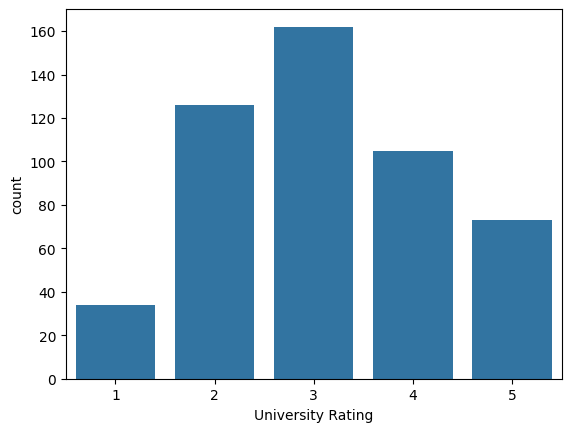

In [20]:
sns.countplot(data=df,x='University Rating')
plt.show()

- highest frequency for University Rating is 3

In [21]:
df['University Rating'].value_counts(normalize=True,sort=False).round(4)*100

,proportion
University Rating,
4,21.0
3,32.4
2,25.2
5,14.6
1,6.8


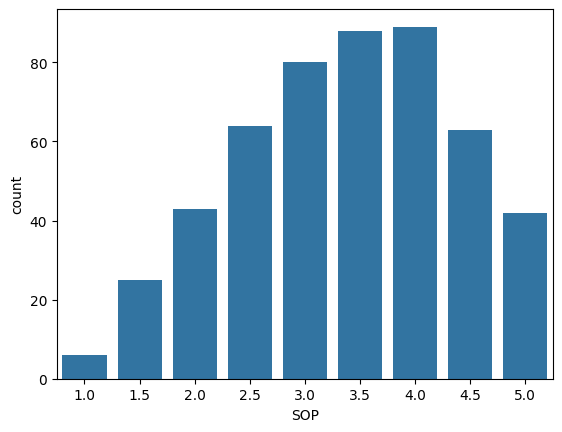

In [22]:
sns.countplot(data=df,x='SOP')
plt.show()

- highest frequency for SOP value is 4.0

In [23]:
df['SOP'].value_counts(normalize=True,sort=False).round(4)*100

,proportion
SOP,
4.5,12.6
4.0,17.8
3.0,16.0
3.5,17.6
2.0,8.6
5.0,8.4
1.5,5.0
1.0,1.2
2.5,12.8


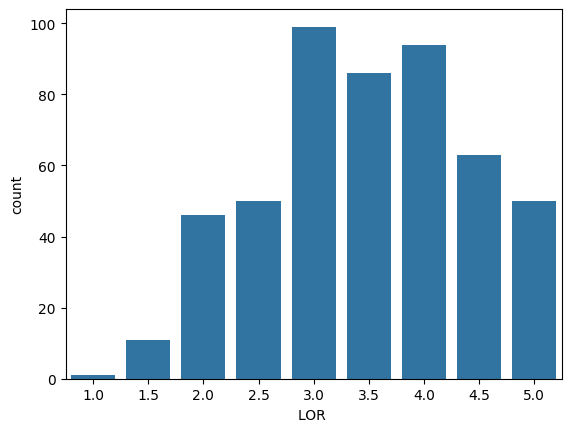

In [24]:
sns.countplot(data=df,x='LOR ')
plt.show()

- highest frequency for LOR value is 3.0

In [25]:
df['LOR '].value_counts(normalize=True,sort=False).round(4)*100

,proportion
LOR,
4.5,12.6
3.5,17.2
2.5,10.0
3.0,19.8
4.0,18.8
1.5,2.2
2.0,9.2
5.0,10.0
1.0,0.2


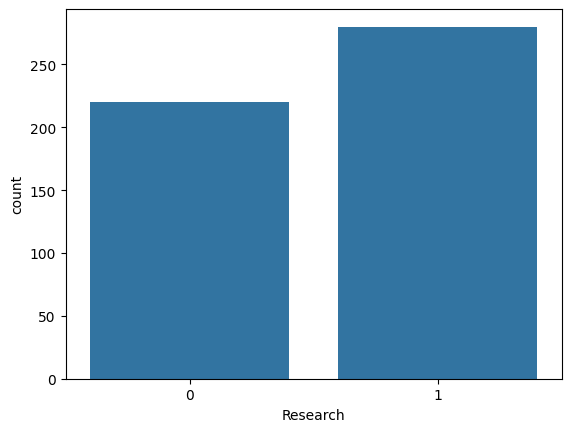

In [26]:
sns.countplot(data=df,x='Research')
plt.show()

In [27]:
df['Research'].value_counts(normalize=True,sort=False).round(4)*100

,proportion
Research,
1,56.0
0,44.0


- Research has slightly higher proportion

## 1.3 Bivariate Analysis

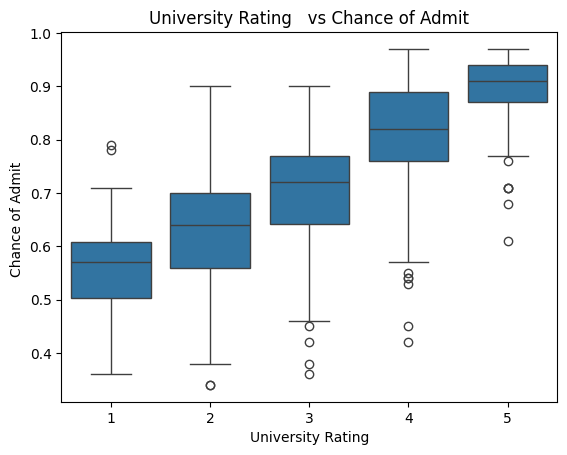

In [28]:
sns.boxplot(data=df ,x= 'University Rating',y= 'Chance of Admit ')
plt.title("University Rating   vs Chance of Admit")
plt.show()

 - Plot shows trend of increasing chance of Admit with University rating

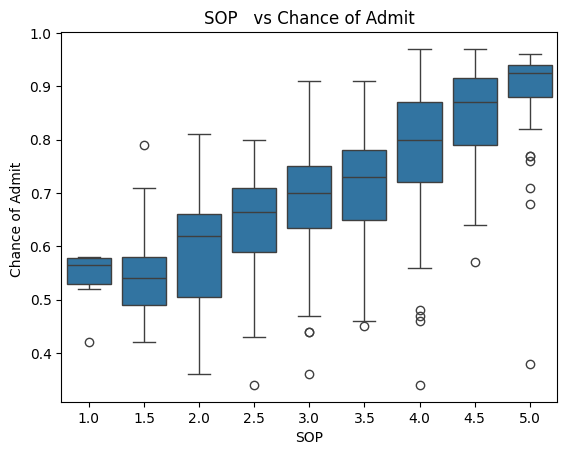

In [29]:
sns.boxplot(data=df ,x= 'SOP',y= 'Chance of Admit ')
plt.title("SOP   vs Chance of Admit")
plt.show()

 - Plot shows trend of increasing chance of Admit with SOP

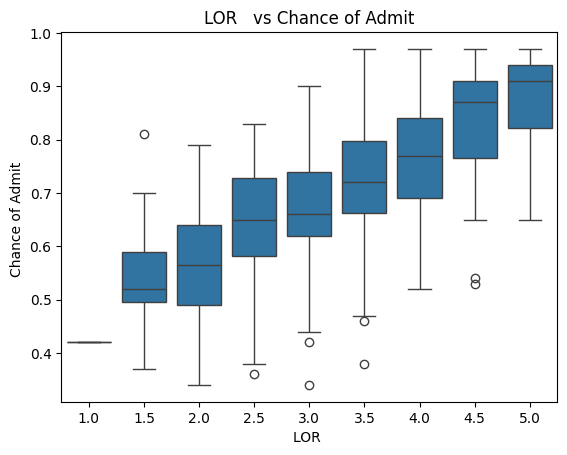

In [30]:
sns.boxplot(data=df ,x= 'LOR ',y= 'Chance of Admit ')
plt.title("LOR   vs Chance of Admit")
plt.show()

 - Plot shows trend of increasing chance of Admit with LOR

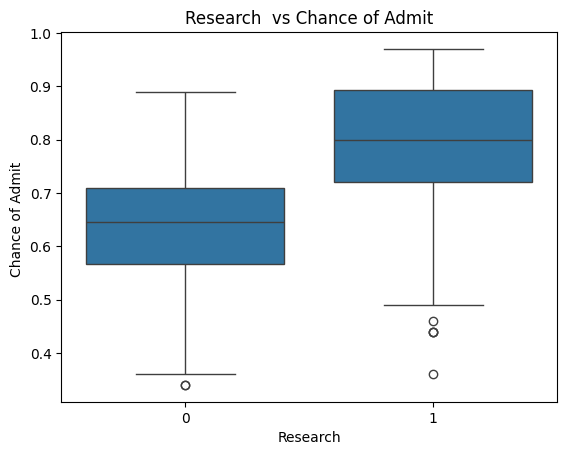

In [31]:
sns.boxplot(data=df ,x= 'Research',y= 'Chance of Admit ')
plt.title("Research  vs Chance of Admit")
plt.show()

 - Chance of admit is higher for research

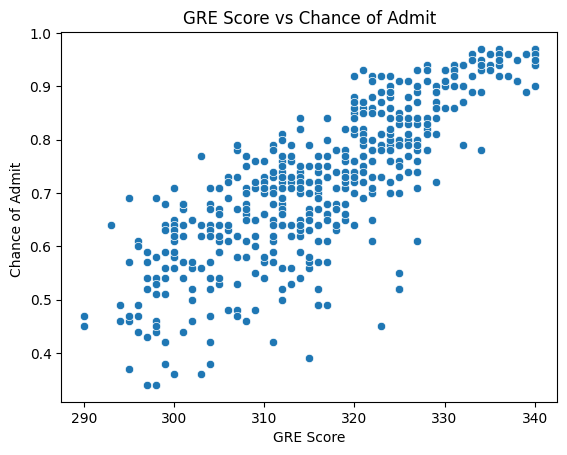

In [32]:
sns.scatterplot(data=df,x='GRE Score',y='Chance of Admit ')
plt.title("GRE Score vs Chance of Admit")
plt.show()

 - Chance of admit increases with GRE score

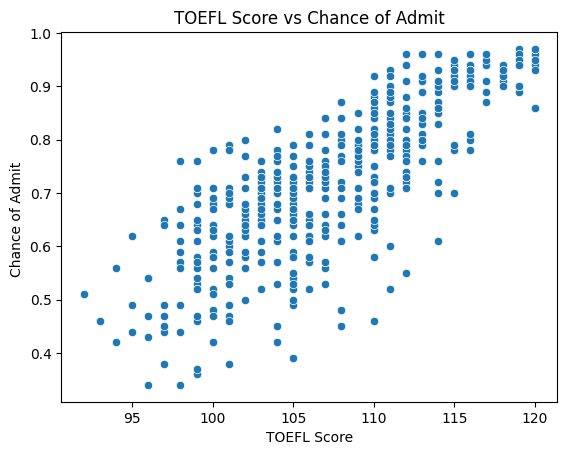

In [33]:
sns.scatterplot(data=df,x='TOEFL Score',y='Chance of Admit ')
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

 - Chance of admit increases with TOEFL score

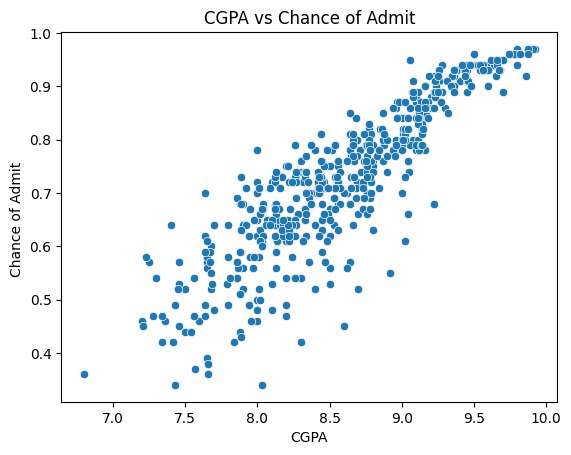

In [34]:
sns.scatterplot(data=df,x='CGPA',y='Chance of Admit ')
plt.title("CGPA vs Chance of Admit")
plt.show()

 - Chance of admit increases with CGPA score

## 1.4 Correlation Analysis

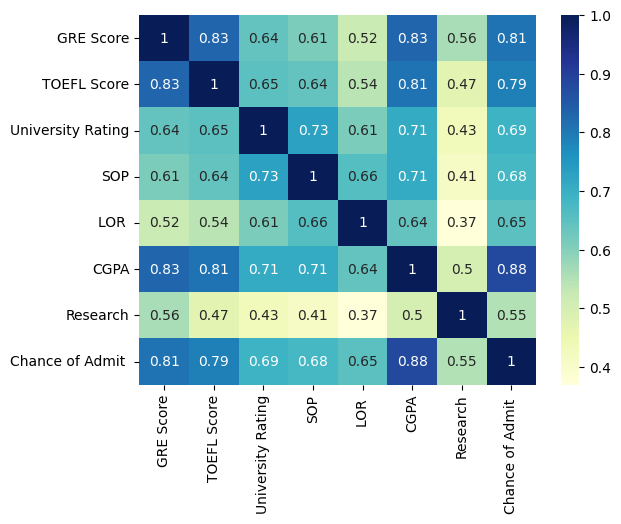

In [35]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)

 - Chance of admit is correlated with GRE score,TOEFL score,CGPA
 - GRE score,TOEFL score are correlated
 - SOP,University Rating are correlated
 - CGPA ,University Rating are correlated

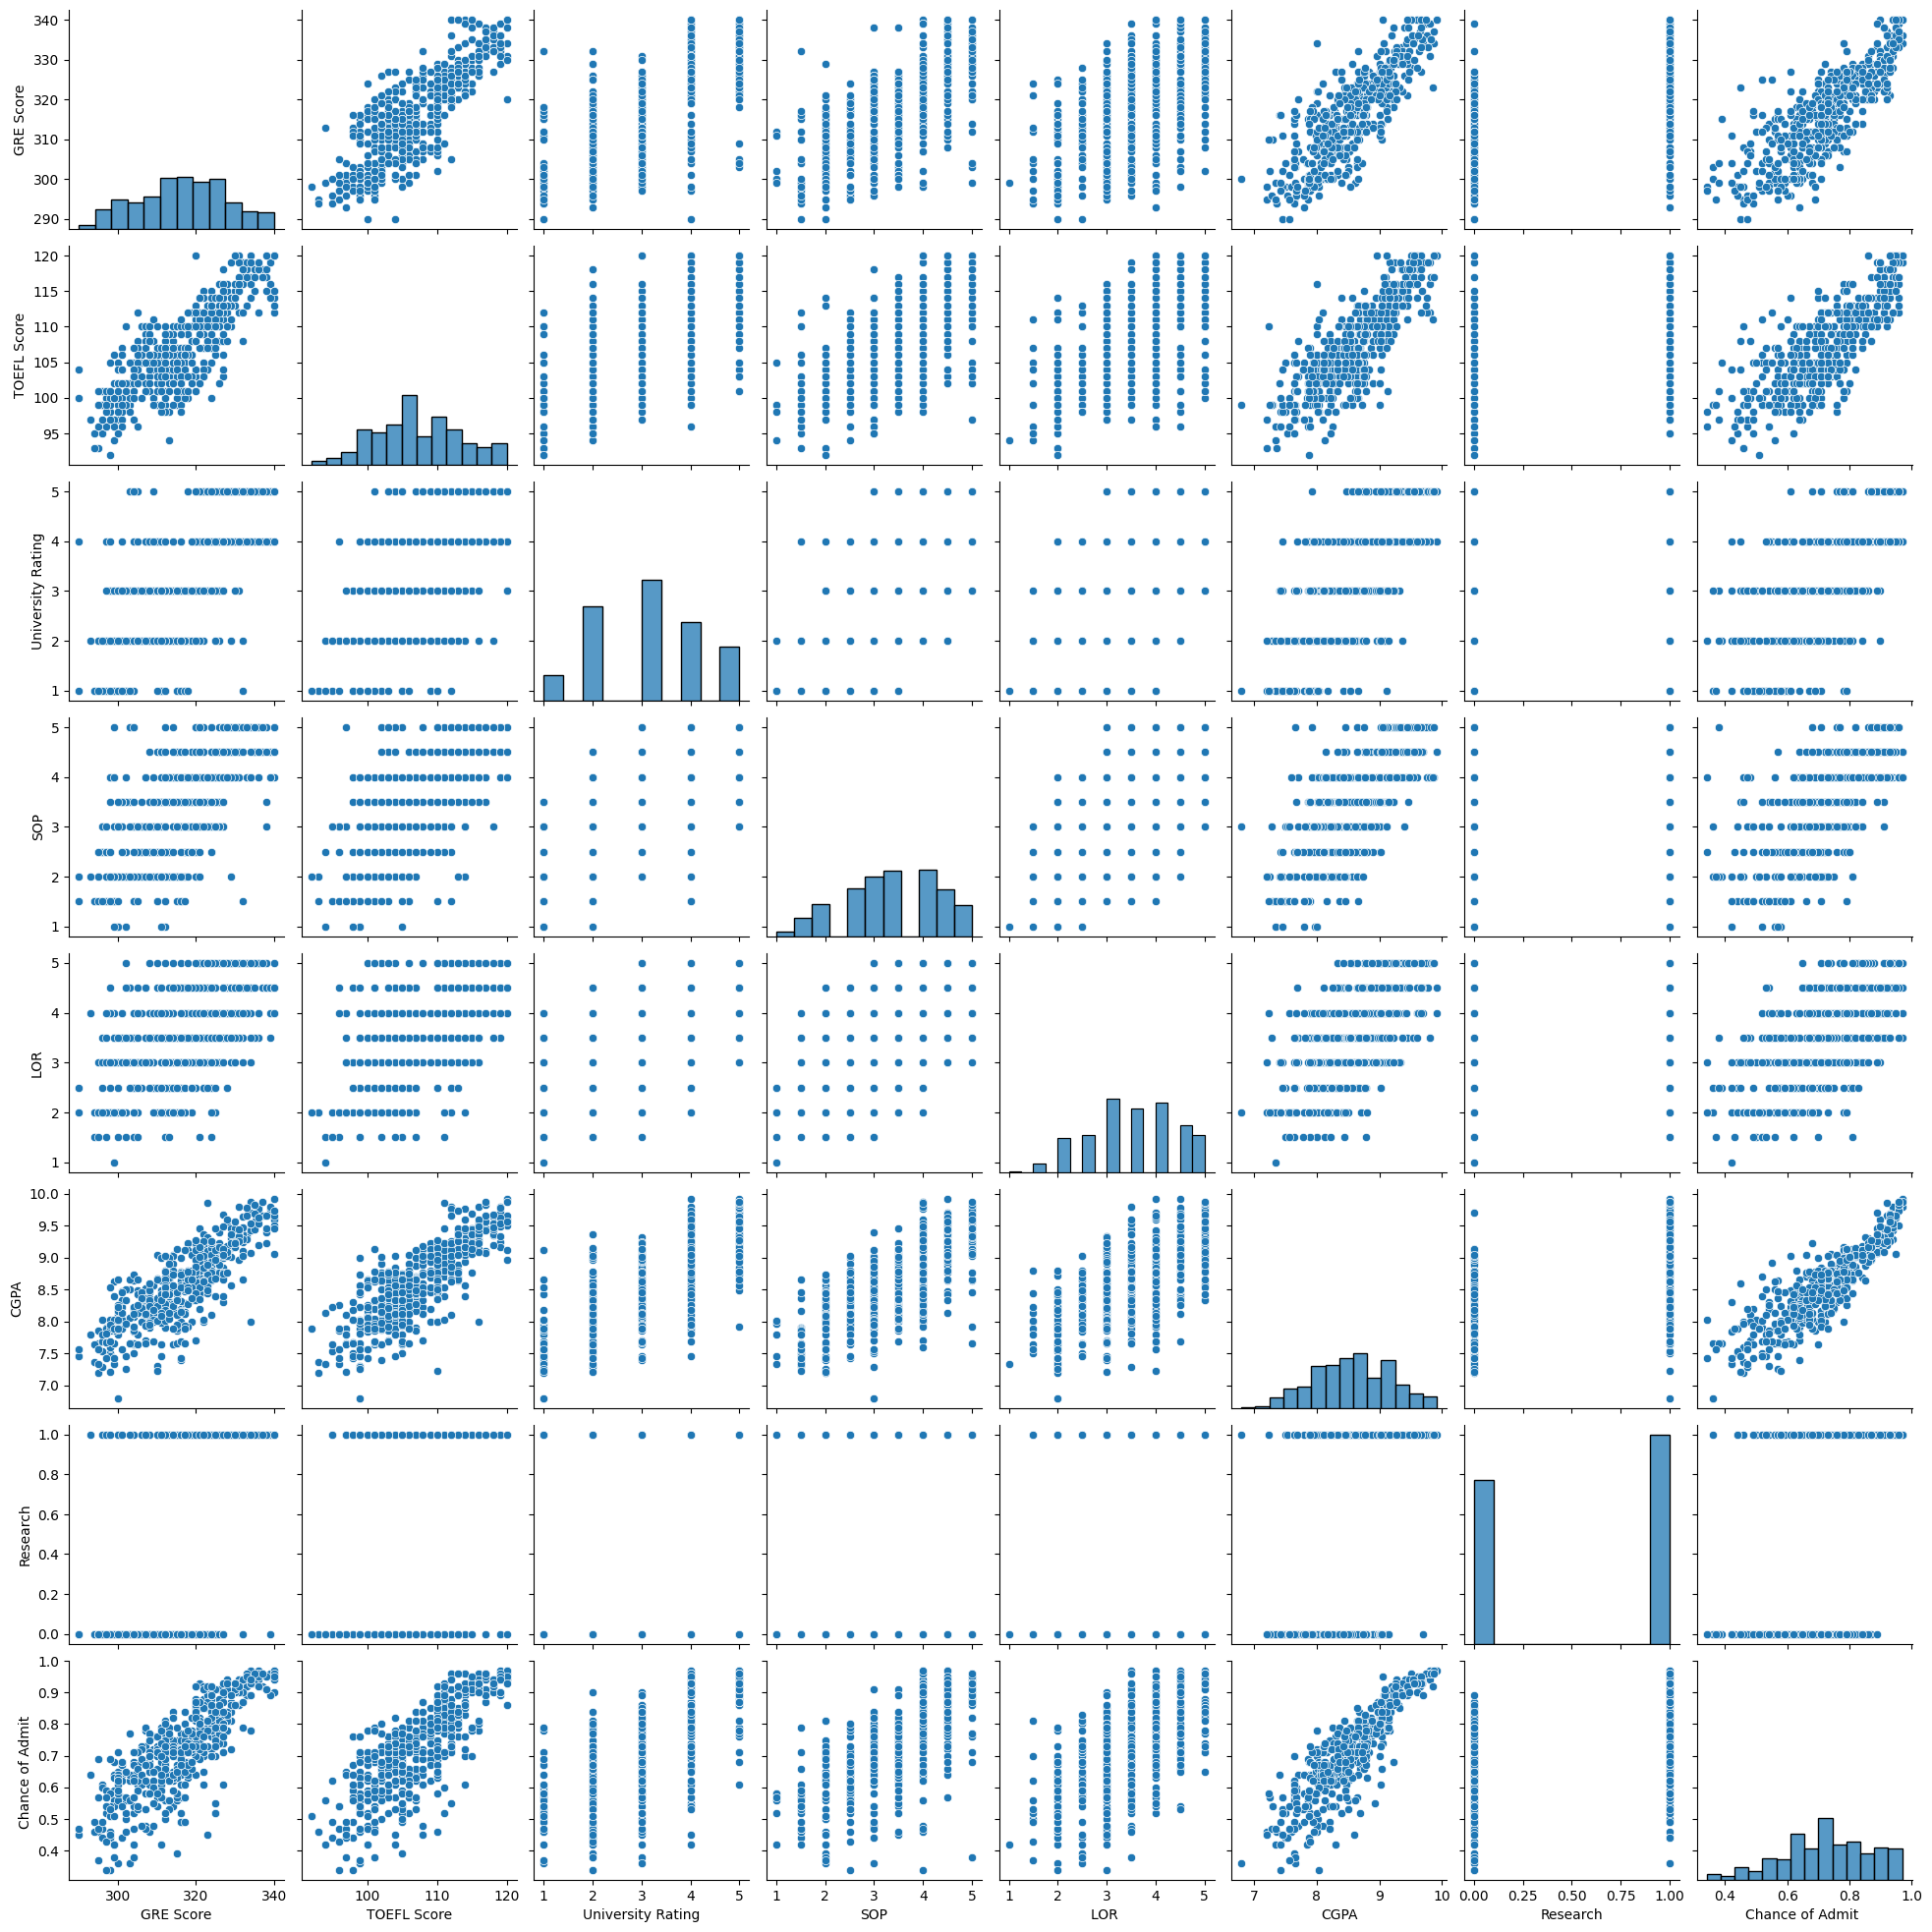

In [36]:
sns.pairplot(df)
plt.show()

# 2.0 Data Preprocessing

##  2.1 check  for duplicates

In [37]:
df.duplicated().sum()

0

##  2.2 check for Missing value

In [38]:
# Number of all missing datapoints
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


## 2.3 Outlier treatment

In [39]:
def outlier(df, col):
    '''
    remove outliers using IQR
    '''
    #calculate q1,q3
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    iqr = q3-q1
    #calculate high,low limit
    hl = q3+1.5*iqr
    ll = q1-1.5*iqr
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    cnt_per=num*100/len(df)
    print(f'column: {col} | percent: {round(100-cnt_per,2)}')
#     return out

In [40]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [41]:
for col in ['GRE Score', 'TOEFL Score',  'CGPA', 'Chance of Admit ']:
    outlier(df, col)

column: GRE Score | percent: 0.0
column: TOEFL Score | percent: 0.0
column: CGPA | percent: 0.0
column: Chance of Admit  | percent: 0.4


- Chance of Admit column has few ouliers ,these can be ignored

## 2.4 Data preparation

### 2.4.1 separate into independent & dependent data

In [42]:
# remove Serial No. since it not required for modelling
X = df.drop('Chance of Admit ', axis=1)
Y = df[['Chance of Admit ']]

In [43]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


###  2.4.2 split data into Train ,Test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state = 42)

## 2.5 Feature Scaling

In [45]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled  = StandardScaler().fit_transform(X_test)

# 3.0 Model building

## 3.1 sklearn linear regression

In [46]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
[print(i,j) for i,j in zip(X_train.columns,*lr.coef_.round(4)*100)]

GRE Score 2.44
TOEFL Score 2.07
University Rating 0.36
SOP 0.15
LOR  1.4000000000000001
CGPA 6.88
Research 1.03


[None, None, None, None, None, None, None]

- CGPA has most influence with highest weight coeff
-this is followed by GRE score,TOEFL score

In [48]:
print('intercept is = ',*lr.intercept_.round(4))

intercept is =  0.7241


In [49]:
y_pred =lr.predict(X_test_scaled)
err= np.asarray(y_test)- y_pred

In [50]:
mae = met.mean_absolute_error(y_test, y_pred)
mse = met.mean_squared_error(y_test, y_pred)
r2 = met.r2_score(y_test, y_pred)

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

mae:0.04212073233623475
mse:0.003640860511481875
rmse:0.060339543514032944
r2 :0.8253118874388582


## 3.2 Ridge regression using sklearn

In [51]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train_scaled,y_train)

Ridge(alpha=10)

In [52]:
[print(i,j) for i,j in zip(X_train.columns,*ridgeReg.coef_.round(4)*100)]

GRE Score 2.59
TOEFL Score 2.16
University Rating 0.47000000000000003
SOP 0.32
LOR  1.43
CGPA 6.279999999999999
Research 1.04


[None, None, None, None, None, None, None]

In [53]:
print('intercept is = ',*ridgeReg.intercept_.round(4))

intercept is =  0.7241


In [54]:
yp_rd = ridgeReg.predict(X_test_scaled)

In [55]:
mae = met.mean_absolute_error(y_test, yp_rd)
mse = met.mean_squared_error(y_test, yp_rd)
r2 = met.r2_score(y_test, yp_rd)

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

mae:0.04236623702536491
mse:0.0036566324892673345
rmse:0.060470095826510264
r2 :0.8245551495682342


## 3.3 Lasso regression using sklearn

In [56]:
#Ridge Regression Model
lassoReg = Lasso(alpha = 10)
lassoReg.fit(X_train_scaled,y_train)

Lasso(alpha=10)

In [57]:
[print(i,j) for i,j in zip(X_train.columns,lassoReg.coef_)]

GRE Score 0.0
TOEFL Score 0.0
University Rating 0.0
SOP 0.0
LOR  0.0
CGPA 0.0
Research 0.0


[None, None, None, None, None, None, None]

- Lasso makes weight coeff for useless features to zero and simplifies model complexity

In [58]:
lassoReg.intercept_

array([0.72408571])

In [59]:
yp_ls = lassoReg.predict(X_test_scaled)

In [60]:
mae = met.mean_absolute_error(y_test, yp_ls)
mse = met.mean_squared_error(y_test, yp_ls)
r2 = met.r2_score(y_test, yp_ls)

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

mae:0.11470247619047622
mse:0.020903199727891154
rmse:0.14457938901479406
r2 :-0.002933371228675874


## 3.4 Linear regression using stats model

In [61]:
import statsmodels.api as sm

In [62]:
# add constant for input to model
X_train1 = sm.add_constant(X_train_scaled)
model   = sm.OLS(y_train,X_train1)
sm_reg = model.fit()
print(sm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.80e-122
Time:                        15:15:12   Log-Likelihood:                 491.18
No. Observations:                 350   AIC:                            -966.4
Df Residuals:                     342   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7241      0.003    225.171      0.0

- CGPA(x6) is most influencial feature

In [63]:
print(sm_reg.rsquared)
print(sm_reg.rsquared_adj)

0.8181753126784597
0.8144537547508258


In [64]:
X_test1 = sm.add_constant(X_test_scaled)
yp_sm= sm_reg.predict(X_test1)

mae = met.mean_absolute_error(y_test, yp_sm)
mse = met.mean_squared_error(y_test, yp_sm)
r2 = met.r2_score(y_test, yp_sm)

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

n,p= X_test_scaled.shape
adj_r2 = 1- ((1-r2) * (n-1)/(n-p-1))
print(f'adj_r2 :{adj_r2}')

mae:0.04212073233623476
mse:0.003640860511481872
rmse:0.06033954351403292
r2 :0.8253118874388583
adj_r2 :0.8167005016083795


# 4.0 Testing assumptions of LR

## 4.1 Multicollinearity check by VIF score

In [65]:
VIF             = pd.DataFrame()
VIF['feature']  = X_train.columns
VIF['VIF']      = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

VIF

,feature,VIF
0,GRE Score,1321.938850
1,TOEFL Score,1097.709644
2,University Rating,20.497128
3,SOP,35.475271
4,LOR,30.611409
5,CGPA,964.431618
6,Research,2.862149


In [66]:
Xnew = X_train.drop(['GRE Score'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = Xnew.columns
VIF['VIF']     = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
VIF

,feature,VIF
0,TOEFL Score,592.989251
1,University Rating,19.537348
2,SOP,33.271430
3,LOR,30.379348
4,CGPA,683.698438
5,Research,2.860019


In [67]:
Xnew = Xnew.drop(['CGPA'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = Xnew.columns
VIF['VIF']     = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
VIF

,feature,VIF
0,TOEFL Score,21.556567
1,University Rating,19.414544
2,SOP,32.793622
3,LOR,28.956698
4,Research,2.854312


In [68]:
Xnew = Xnew.drop(['SOP'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = Xnew.columns
VIF['VIF']     = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
VIF

,feature,VIF
0,TOEFL Score,19.617867
1,University Rating,14.594198
2,LOR,24.780074
3,Research,2.843807


In [69]:
Xnew = Xnew.drop(['LOR '], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = Xnew.columns
VIF['VIF']     = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
VIF

,feature,VIF
0,TOEFL Score,9.913482
1,University Rating,11.594097
2,Research,2.831722


In [70]:
Xnew = Xnew.drop(['University Rating'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = Xnew.columns
VIF['VIF']     = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
VIF

,feature,VIF
0,TOEFL Score,2.420412
1,Research,2.420412


- VIF calculation shows presence of multi collinearity among features
- Multi collinearity affects model performance

## 4.2  Mean of residuals is nearly zero

In [71]:
residuals =sm_reg.resid
np.mean(residuals)

1.8017333656773968e-16

In [72]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html#regression-diagnostics
from scipy import stats
mu, std = stats.norm.fit(sm_reg.resid)
print(f'mean:{mu}')
print(f'std dev:{std}')


mean:1.8017333656773968e-16
std dev:0.059469084005104485


- it is obeserved that mean of residual is near zero value

## 4.3  Linearity of variables (no pattern in the residual plot)

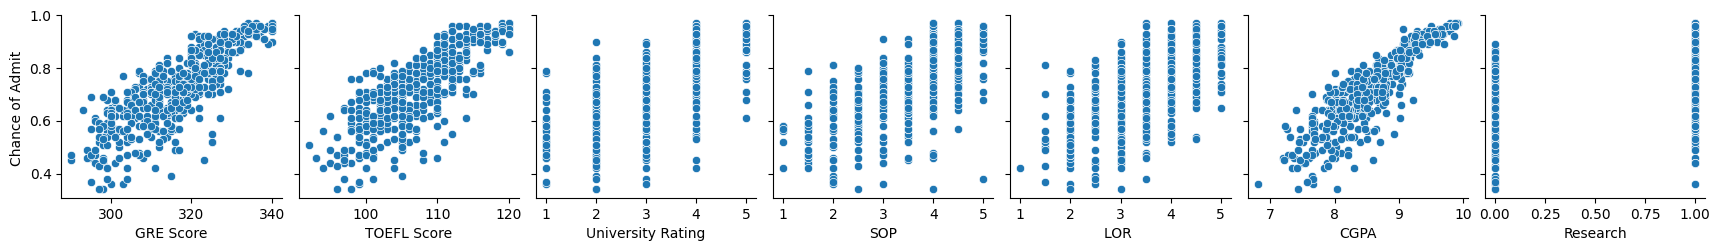

In [73]:
sns.pairplot(data=df,
                  x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research'],
                  y_vars=['Chance of Admit ']
                  )
plt.show()

-  plot of target with independent feature shows collinearity for GRE SCore,TOEFL score,CGPA

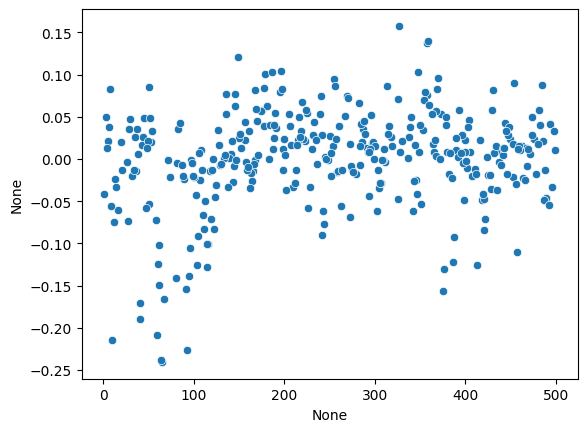

In [74]:
sns.scatterplot(x=residuals.index,y=residuals)
plt.show()

-  plot of residuals of fitted OLS model does not show any pattern for residuals

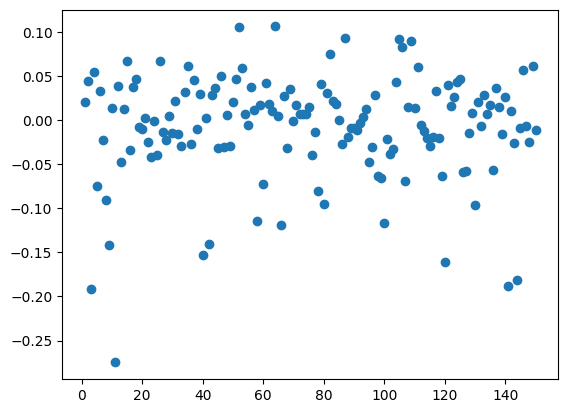

In [75]:
indx=np.arange(len(err))+1
plt.scatter(indx,err)
plt.show()

-  plot of residuals of test data does not show any pattern for residuals

## 4.4  Test for Homoscedasticity

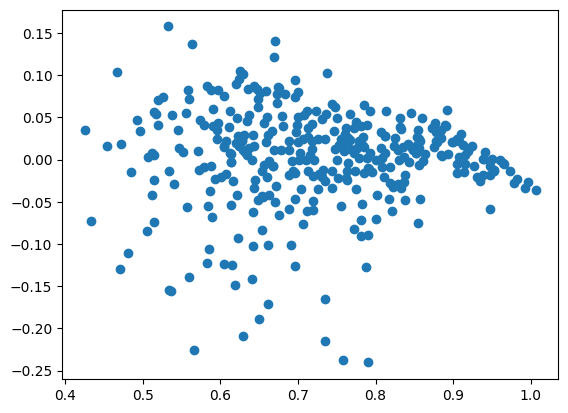

In [76]:
#https://github.com/quantrocket-codeload/quant-finance-lectures/blob/6c2e5430387f8e58337f58936cf1bd3a8135b21a/quant_finance_lectures/Lecture18-Residual-Analysis.ipynb
plt.scatter(sm_reg.predict(), residuals)
plt.show()

-  plot of prediction vs residuals   does not show any homoscedasticity

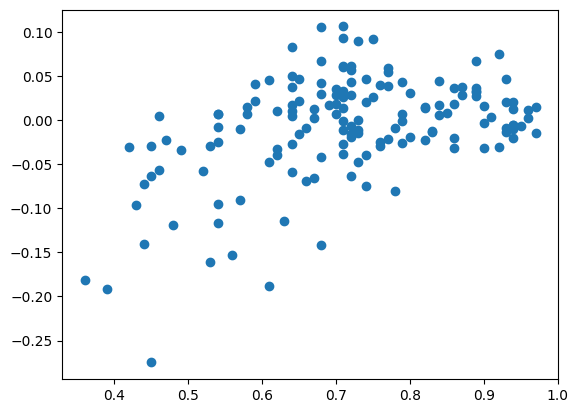

In [77]:
plt.scatter(y_test,err)
plt.show()

-  plot of prediction vs residuals   does not show any homoscedasticity

## 4.5  Normality of residuals

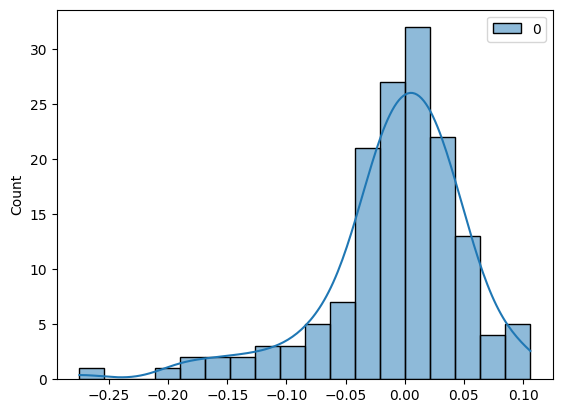

In [78]:
sns.histplot(err, kde=True)
plt.show()

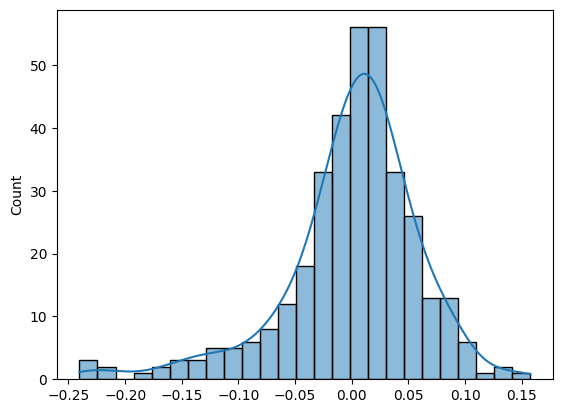

In [79]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html#q-q-plot
sns.histplot(residuals, kde=True)
plt.show()

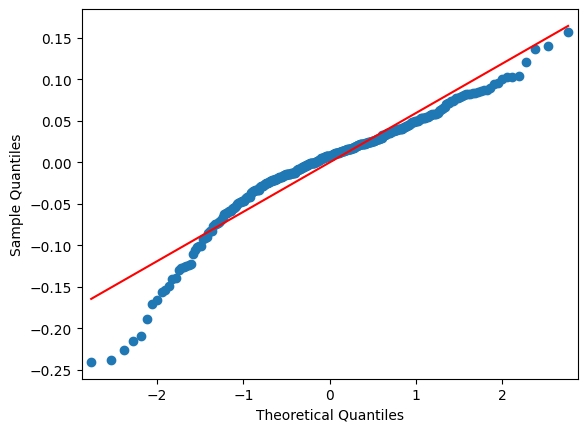

In [80]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html#q-q-plot
sm.qqplot(residuals, line='s');
plt.show()

-  plot of residuals is roughly normal.QQplot is also shown

# 5. Model performance evaluation

## Metrics checked - MAE, RMSE, R2, Adj R2

In [81]:
mae = met.mean_absolute_error(y_test, yp_sm)
mse = met.mean_squared_error(y_test, yp_sm)

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{sm_reg.rsquared}')
print(f'adj-r2 :{sm_reg.rsquared_adj}')

mae:0.04212073233623476
mse:0.003640860511481872
rmse:0.06033954351403292
r2 :0.8181753126784597
adj-r2 :0.8144537547508258


In [82]:
r2 = met.r2_score(y_test, yp_sm)
print(f'r2 :{r2}')

n,p= X_test_scaled.shape
adj_r2 = 1- ((1-r2) * (n-1)/(n-p-1))
adj_r2
print(f'adj_r2 :{adj_r2}')

r2 :0.8253118874388583
adj_r2 :0.8167005016083795


## train performance

In [83]:
yp_sm_tr = sm_reg.predict(X_train1)

mae = met.mean_absolute_error(y_train, yp_sm_tr)
mse = met.mean_squared_error(y_train, yp_sm_tr)
r2 = met.r2_score(y_train, yp_sm_tr)


print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
# print(f'r2 :{sm_reg.rsquared}')
# print(f'adj-r2 :{sm_reg.rsquared_adj}')
print(f'r2 :{r2}')

n,p= X_train_scaled.shape
adj_r2 = 1- ((1-r2) * (n-1)/(n-p-1))
print(f'adj_r2 :{adj_r2}')

mae:0.04235517320861345
mse:0.0035365719524061744
rmse:0.059469084005104485
r2 :0.8181753126784597
adj_r2 :0.8144537547508258


- R2-score is good indicating that most of the variability is explained by the features. So model is robust
- R2 ,adjusted R2 are nearly same indicating there is no overfit. similarly train,test r2 values are not much different
- rmse score is low indicating model accuracy is good with low error
- removal of features with high VIF can improve the model and can be investigated
- top 3 feaure are CGPA, GRE score,TOEFL score


# 6.0 Insights & Recommendations

**Insights**
- Model accuracy can be further improved using feature engineering,proper regularization,removing multi collinearity of features
- Lasso regularisation eliminates useless features by making coefficients zero. This is useful infeature selection when there are many features. This helps to interpret feature importance.
- Ridge regularisation is useful when features have roughly same feature importance.and when features are correlated.

**Recommendations**   
Implementing ML to predict chances of admit is beneficial to both Education institute and the students.   
- **students** benefit by knowing their probabitily of getting admitted and areas of improvement.This will increase quality of service and improve customer satisfaction. Student can increase chance of amit by getting better CGPS,GRE & TOEFL scores (most important features)
- **Education institute**  can use the ML prediction to provided customised learning program to the students. This has potential to increase business.

